## face_Mask_Detection

In [1]:
#import libraries
from zipfile import ZipFile
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
#from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model
import tensorflow


## Images in a zip file We will decompress and encode the images then split the images

In [2]:
dataset =  'face-mask-dataset.zip'
with ZipFile(dataset,'r') as zip:
    zip.extractall()
    print('dataset done: ')

dataset done: 


In [3]:
with_mask_files = os.listdir('data/with_mask')
without_mask_files = os.listdir('data/without_mask')
print(len(with_mask_files))
print(len(without_mask_files))

3725
3828


In [4]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [5]:
labels = with_mask_labels + without_mask_labels

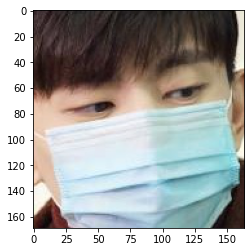

In [6]:
# displaying with mask image
img = mpimg.imread('data/with_mask/with_mask_1554.jpg')
imgplot = plt.imshow(img)
plt.show()

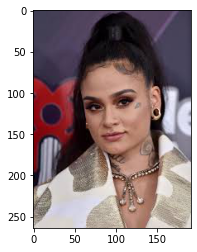

In [7]:
img = mpimg.imread('data/without_mask/without_mask_2954.jpg')
imgplt = plt.imshow(img)
plt.show()

In [7]:
#Now we convert it to a numpy array to be read and trained
mask_path = 'data/with_mask/'

data = []

for img_file in with_mask_files:
  image = Image.open(mask_path + img_file)
  image = image.resize((64,64))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


without_mask_path = 'data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((64,64))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

D:\Anaconda3\envs\Tensorflow\lib\site-packages\PIL\Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [8]:

len(data)

7553

In [9]:
type(data)

list

In [10]:
data[0]

array([[[ 48,  56,  34],
        [ 63,  62,  39],
        [ 51,  54,  28],
        ...,
        [101,  64,  32],
        [ 40,  42,  27],
        [ 30,  37,  22]],

       [[ 51,  59,  37],
        [ 55,  55,  26],
        [ 42,  40,  19],
        ...,
        [134,  79,  44],
        [ 58,  48,  22],
        [ 18,  25,  17]],

       [[ 51,  57,  42],
        [ 44,  44,  27],
        [ 31,  32,  13],
        ...,
        [106,  64,  40],
        [ 65,  54,  29],
        [ 27,  21,  10]],

       ...,

       [[ 82,  90,  56],
        [ 79,  91,  50],
        [ 71,  83,  48],
        ...,
        [ 11,  12,  10],
        [ 19,  21,  13],
        [ 32,  36,  27]],

       [[ 71,  80,  43],
        [ 70,  82,  46],
        [ 64,  78,  50],
        ...,
        [ 12,  14,   8],
        [  9,   9,   6],
        [ 25,  25,  20]],

       [[ 57,  69,  36],
        [ 59,  65,  42],
        [ 59,  67,  46],
        ...,
        [ 23,  20,   7],
        [ 15,  16,  12],
        [ 15,  11,  10]]

## We are now going to the stage of dividing the images into testing and training

In [11]:
x = np.array(data)
y = np.array(labels)

In [12]:
print(x.shape)
print(y.shape)

(7553, 64, 64, 3)
(7553,)


In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=15)

In [14]:
# We divide by 255 so that the training is done properly

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [15]:
# We start to create the neural network
#Note: The number of nerves varies according to the size of the data and the accuracy.
#   You can experiment more than once until you reach the best result
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(64,64,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [16]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
160/160 [==============================] - 12s 71ms/step - loss: 0.4540 - acc: 0.7932 - val_loss: 0.2812 - val_acc: 0.8871
Epoch 2/5
160/160 [==============================] - 11s 69ms/step - loss: 0.2898 - acc: 0.8860 - val_loss: 0.2598 - val_acc: 0.9012
Epoch 3/5
160/160 [==============================] - 11s 70ms/step - loss: 0.2469 - acc: 0.9019 - val_loss: 0.2425 - val_acc: 0.9048
Epoch 4/5
160/160 [==============================] - 12s 73ms/step - loss: 0.2135 - acc: 0.9143 - val_loss: 0.2864 - val_acc: 0.9012
Epoch 5/5
160/160 [==============================] - 12s 77ms/step - loss: 0.1917 - acc: 0.9251 - val_loss: 0.2026 - val_acc: 0.9153


In [17]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

60/60 [==============================] - 1s 20ms/step - loss: 0.1900 - acc: 0.9148
Test Accuracy = 0.91476970911026


## The result is excellent without overfitting

## We save the neural network

In [ ]:
model.save('cnn.h5')